In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('Indian Liver Patient Dataset (ILPD) (1).csv')

In [3]:
data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
columns = {'tot_bilirubin': 'Total_Bilirubin',
          'tot_proteins': 'Alkaline Phosphotase',
          'ag_ratio':'Aspartate Aminotransferase',
          'sgpt': 'Total_Protein',
          'sgot': 'Albumin',
          'is_patient':'Liver_disease',
          'alkphos': 'Albumin_and_Globulin_Ratio',
          'albumin':'Alamine Aminotransferase'}
data = data.rename(columns = columns, inplace=False)

In [6]:
data.head()

,age,gender,Total_Bilirubin,direct_bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
data.describe()

,age,Total_Bilirubin,direct_bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
data['Liver_disease'].unique()

array([1, 2], dtype=int64)

In [9]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
data.isnull().sum()

age                           0
gender                        0
Total_Bilirubin               0
direct_bilirubin              0
Alkaline Phosphotase          0
Alamine Aminotransferase      0
Aspartate Aminotransferase    0
Total_Protein                 0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_disease                 0
dtype: int64

<AxesSubplot:>

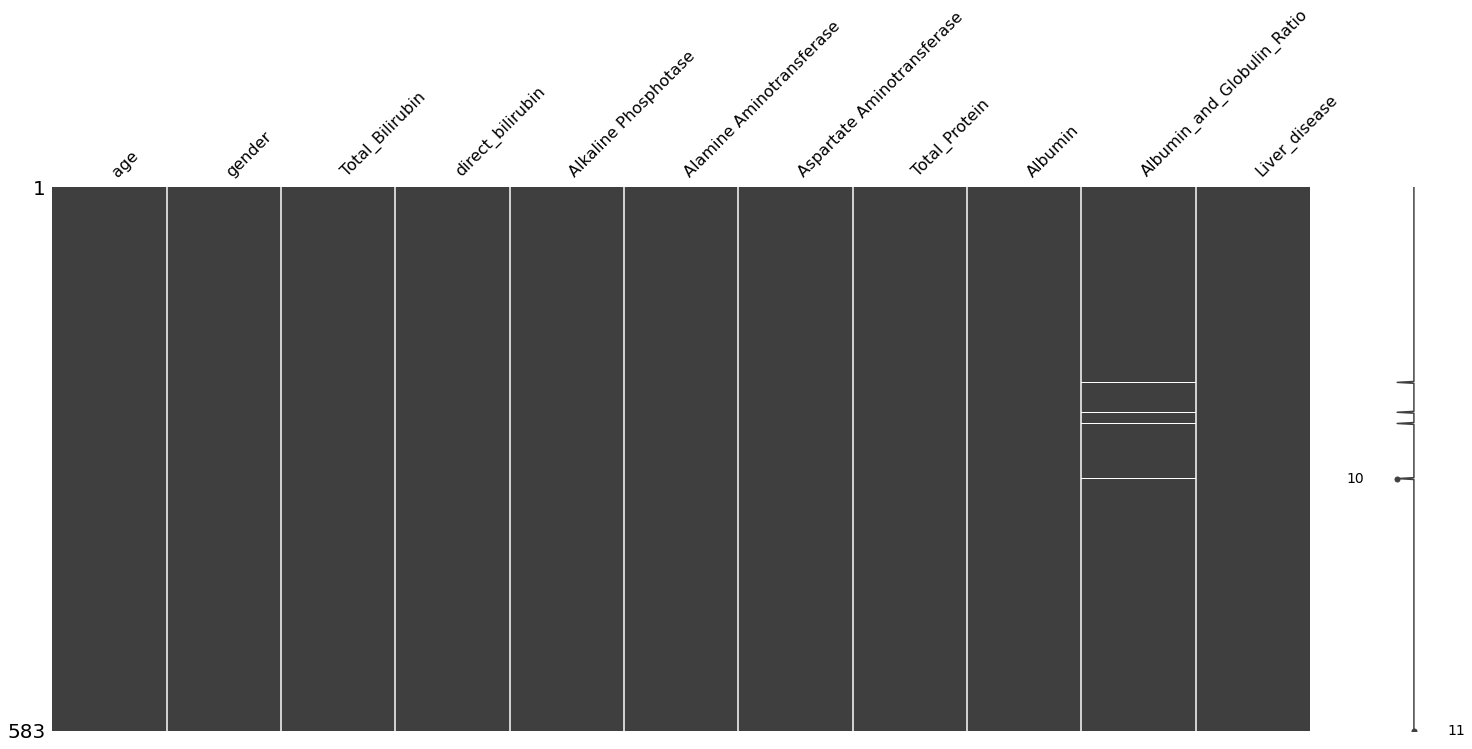

In [11]:
import missingno as msno
%matplotlib inline
msno.matrix(data)

In [12]:
df = data.dropna()

<AxesSubplot:>

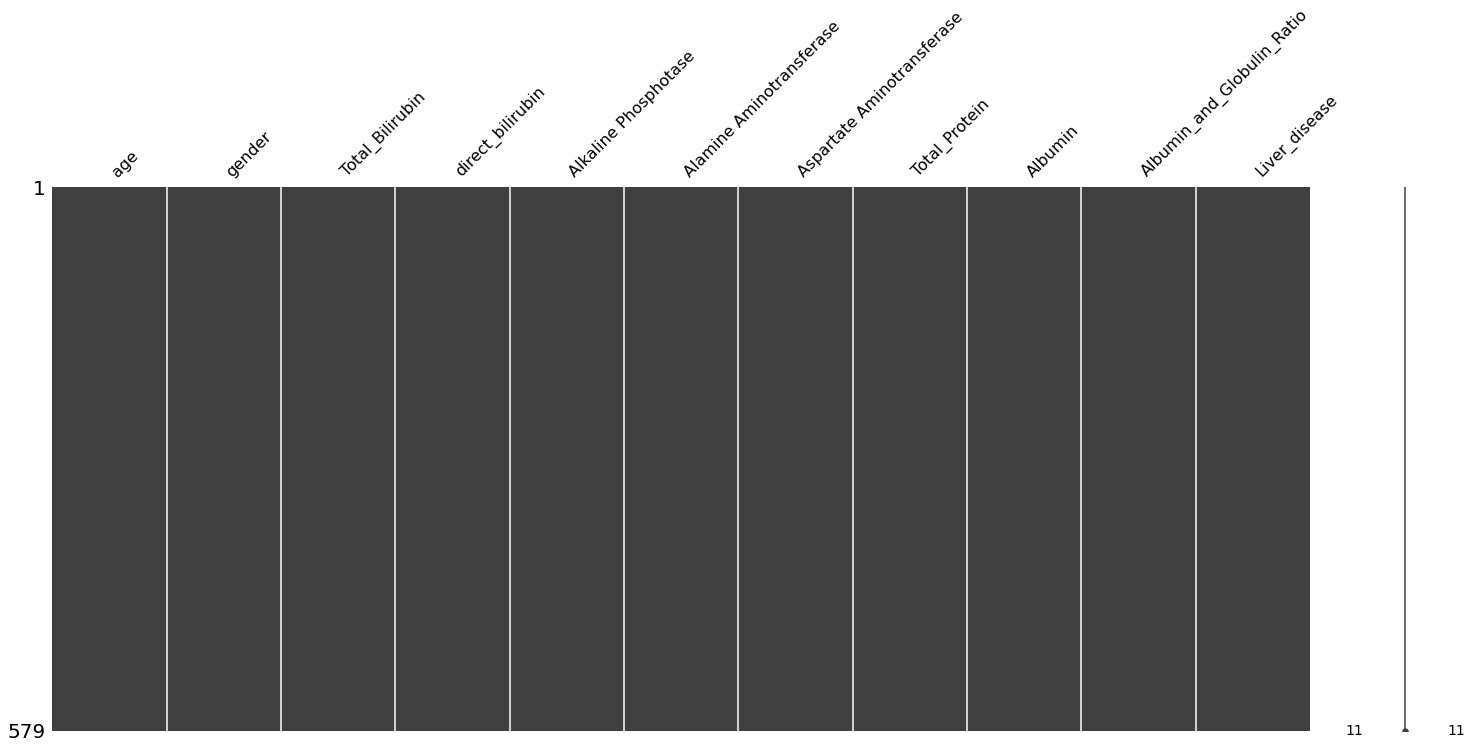

In [13]:
msno.matrix(df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         579 non-null    int64  
 1   gender                      579 non-null    object 
 2   Total_Bilirubin             579 non-null    float64
 3   direct_bilirubin            579 non-null    float64
 4   Alkaline Phosphotase        579 non-null    int64  
 5   Alamine Aminotransferase    579 non-null    int64  
 6   Aspartate Aminotransferase  579 non-null    int64  
 7   Total_Protein               579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Liver_disease               579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [15]:
df['Alkaline Phosphotase'].unique()

array([ 187,  699,  490,  182,  195,  208,  154,  202,  290,  210,  260,
        310,  214,  145,  183,  342,  165,  293,  610,  482,  542,  231,
        194,  289,  240,  128,  188,  190,  156,  410,  374,  263,  275,
        168,  160,  630,  415,  150,  230,  176,  206,  170,  161,  253,
        198,  272,  175,  367,  158,  259,  470,  215,  239,  186,  205,
        171,  162,  518, 1620,  146,  670,  915,   75,  148,  258,  237,
        269,  320,  298,  538,  238,  308,  204,  282,  265,  312,  243,
        224,  225,  486,  257,  179,  661, 1580, 1630,  280,  300,  178,
        177,  201,  802,  248, 1896,  512,  199, 1110,  380,  159,  332,
        189,  392,  286,  180,  218,  462,  196,  750, 1050,  599,  292,
        962,  950,  200, 1020,  562,  386,  250,  191,  614,  314,  209,
       1124,  664,  142,  169, 1420,  135,  163,  285,  350,  220,  219,
        401,  100,  116,  125,  147,  192,  400,  120,  173,  157, 2110,
        360,  316,  498,  480,  680,  152,  859,  9

In [16]:
#Tukey's Method
def tukeys_method(df,variable):
    
     #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1
    inner_fence = 1.5 * iqr
    outer_fence = 3 * iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1 - inner_fence
    inner_fence_ue = q3 + inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1 - outer_fence
    outer_fence_ue = q1 + outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
            
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
        
    return outliers_prob, outliers_poss


In [17]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df,'Alamine Aminotransferase')   

print("Probable Outliers Alamine Aminotransferase : {} %".format(len(probable_outliers_tm)/len(df) *100))
print("Possible Outliers Alamine Aminotransferase : {} %".format(len(possible_outliers_tm)/len(df) *100))

Probable Outliers Alamine Aminotransferase : 10.708117443868739 %
Possible Outliers Alamine Aminotransferase : 12.607944732297064 %


In [18]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df,'Alkaline Phosphotase')   

print("Probable Outliers Alkaline Phosphotase : {} %".format(len(probable_outliers_tm)/len(df) *100))
print("Possible Outliers Alkaline Phosphotase : {} %".format(len(possible_outliers_tm)/len(df) *100))

Probable Outliers Alkaline Phosphotase : 9.153713298791018 %
Possible Outliers Alkaline Phosphotase : 11.917098445595855 %


In [19]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df,'Aspartate Aminotransferase')   

print("Probable Outliers Aspartate Aminotransferase : {} %".format(len(probable_outliers_tm)/len(df) *100))
print("Possible Outliers Aspartate Aminotransferase : {} %".format(len(possible_outliers_tm)/len(df) *100))

Probable Outliers Aspartate Aminotransferase : 9.671848013816927 %
Possible Outliers Aspartate Aminotransferase : 11.744386873920552 %


In [20]:
df.head(10)

,age,gender,Total_Bilirubin,direct_bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [21]:
#Validate each class to understand if the dataset is imbalanced.
print ('Total Unhealthy Livers :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[1], round(df.Liver_disease.value_counts()[1]/df.Liver_disease.value_counts().sum()*100,2)))
print ('Total Healthy Livers :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[2], round(df.Liver_disease.value_counts()[2]/df.Liver_disease.value_counts().sum()*100,2)))

Total Unhealthy Livers :  414 and its percentage is 71.5 %
Total Healthy Livers :  165 and its percentage is 28.5 %


Text(0.5, 1.0, 'Alkaline Phosphotase in Liver Patient')

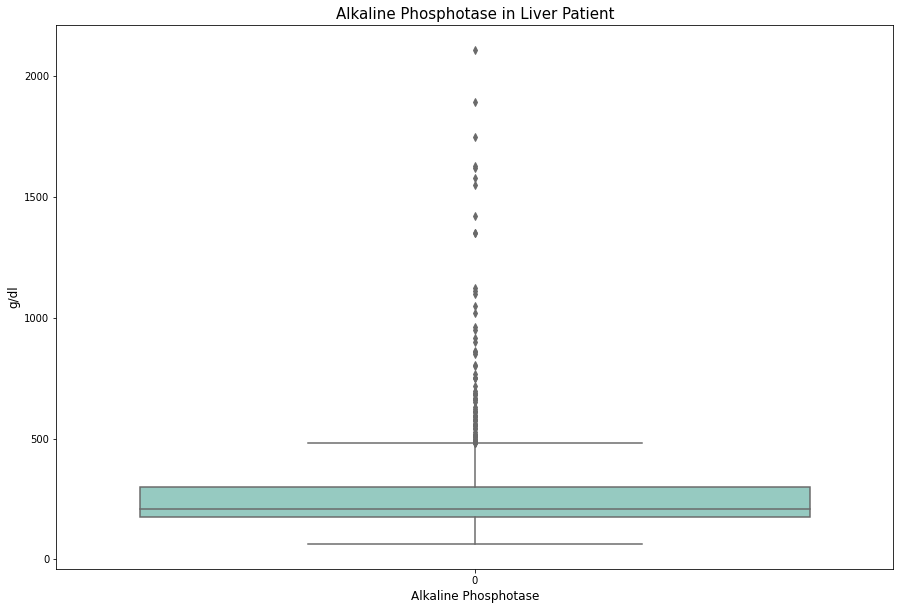

In [22]:
fig = plt.figure(figsize=(15, 10)) 
ax = sns.boxplot(data=df['Alkaline Phosphotase'], orient="v", palette="Set3")
plt.xlabel("Alkaline Phosphotase", fontsize= 12)
plt.ylabel("g/dl", fontsize= 12)
plt.title("Alkaline Phosphotase in Liver Patient", fontsize= 15)

Text(0.5, 1.0, 'Aspartate Aminotransferase in Liver Patient')

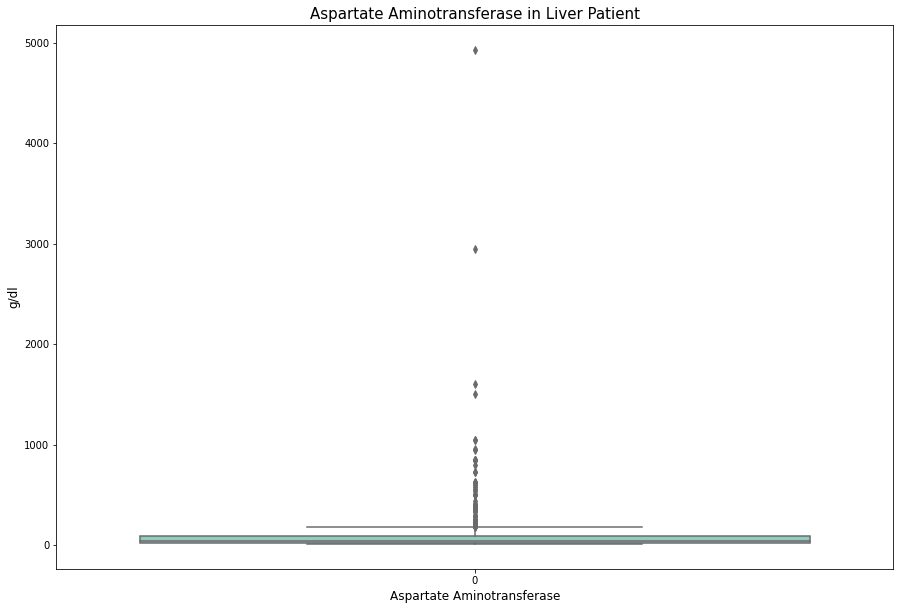

In [23]:
fig = plt.figure(figsize=(15, 10)) 
ax = sns.boxplot(data=df['Aspartate Aminotransferase'], orient="v", palette="Set3")
plt.xlabel("Aspartate Aminotransferase", fontsize= 12)
plt.ylabel("g/dl", fontsize= 12)
plt.title("Aspartate Aminotransferase in Liver Patient", fontsize= 15)

Text(0.5, 1.0, 'Alamine Aminotransferase in Liver Patient')

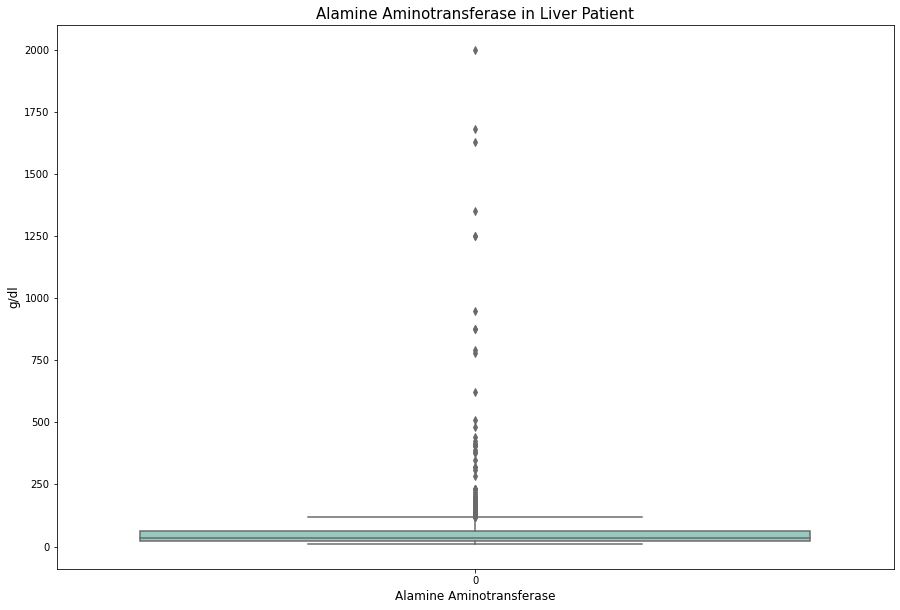

In [24]:
fig = plt.figure(figsize=(15, 10)) 
ax = sns.boxplot(data=df['Alamine Aminotransferase'], orient="v", palette="Set3")
plt.xlabel("Alamine Aminotransferase", fontsize= 12)
plt.ylabel("g/dl", fontsize= 12)
plt.title("Alamine Aminotransferase in Liver Patient", fontsize= 15)

Text(0.5, 1.0, 'Total Protein in Liver Patient')

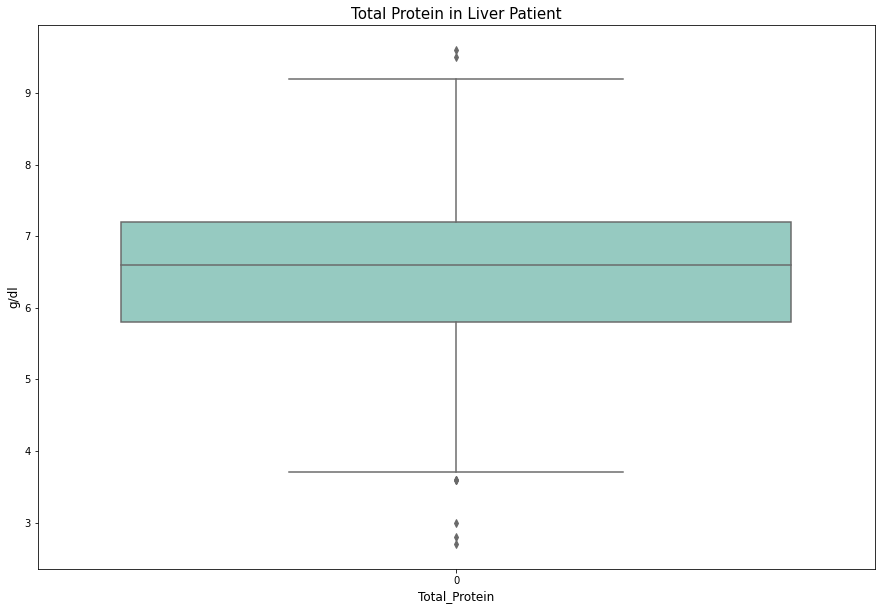

In [25]:
fig = plt.figure(figsize=(15, 10)) 
ax = sns.boxplot(data=df['Total_Protein'], orient="v", palette="Set3")
plt.xlabel("Total_Protein", fontsize= 12)
plt.ylabel("g/dl", fontsize= 12)
plt.title("Total Protein in Liver Patient", fontsize= 15)

In [26]:
df['Liver_disease']= df['Liver_disease'].replace([1,2],['Unhealty Liver','Healthy Liver'])

Text(0.5, 1.0, 'Liver Disease')

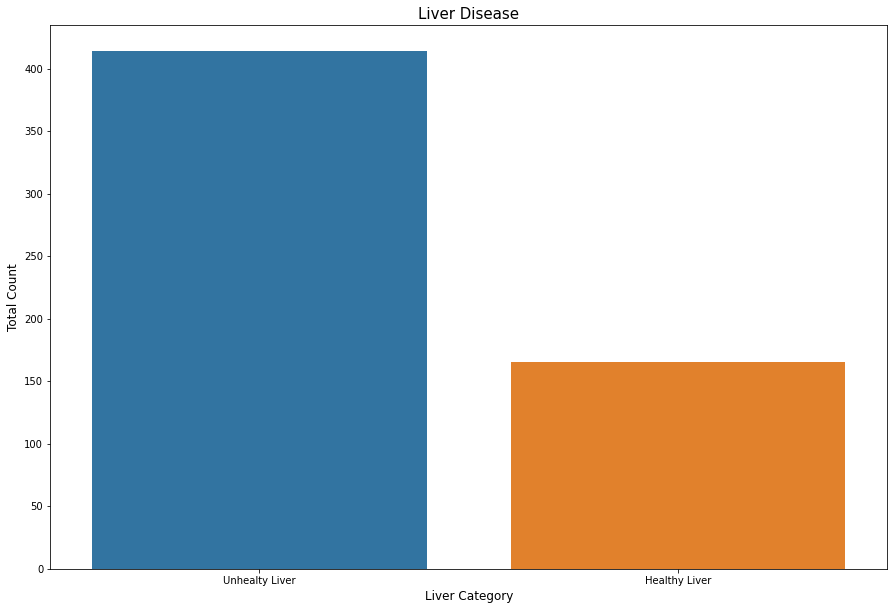

In [27]:
fig = plt.figure(figsize=(15, 10))
ax = sns.countplot(x="Liver_disease", data=df)
plt.xlabel("Liver Category", fontsize= 12)
plt.ylabel("Total Count", fontsize= 12)
plt.title("Liver Disease", fontsize= 15)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   direct_bilirubin            583 non-null    float64
 4   Alkaline Phosphotase        583 non-null    int64  
 5   Alamine Aminotransferase    583 non-null    int64  
 6   Aspartate Aminotransferase  583 non-null    int64  
 7   Total_Protein               583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Liver_disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [29]:
data['Alamine Aminotransferase'].mean()

80.71355060034305

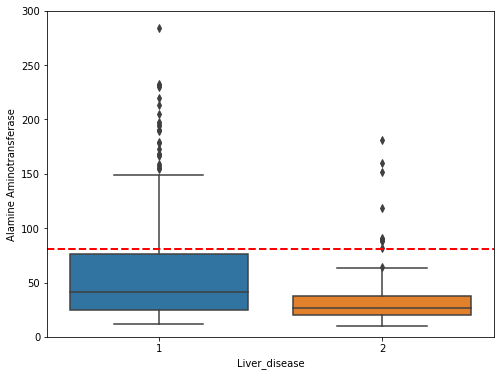

In [30]:
var = 'Liver_disease'
data_plt = pd.concat([data['Alamine Aminotransferase'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Alamine Aminotransferase", data=data_plt)
fig.axis(ymin=0, ymax=300)
plt.axhline(data['Alamine Aminotransferase'].mean(),color='r',linestyle='dashed',linewidth=2)

Text(0.5, 1.0, 'Liver Disease Relationship with Alkaline')

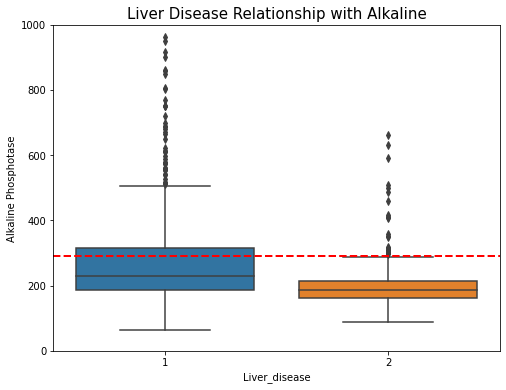

In [31]:
var = 'Liver_disease'
data_plt = pd.concat([data['Alkaline Phosphotase'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Alkaline Phosphotase", data=data_plt)
fig.axis(ymin=0, ymax=1000)
plt.axhline(data['Alkaline Phosphotase'].mean(),color='r',linestyle='dashed',linewidth=2)
plt.title("Liver Disease Relationship with Alkaline", fontsize= 15)

Text(0.5, 1.0, 'Liver Disease Relationship with Aspartate')

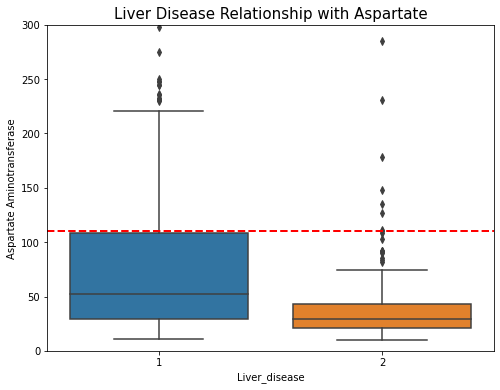

In [32]:
var = 'Liver_disease'
data_plt = pd.concat([data['Aspartate Aminotransferase'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Aspartate Aminotransferase", data=data_plt)
fig.axis(ymin=0, ymax=300)
plt.axhline(data['Aspartate Aminotransferase'].mean(),color='r',linestyle='dashed',linewidth=2)
plt.title("Liver Disease Relationship with Aspartate", fontsize= 15)

<AxesSubplot:xlabel='Alamine Aminotransferase', ylabel='Density'>

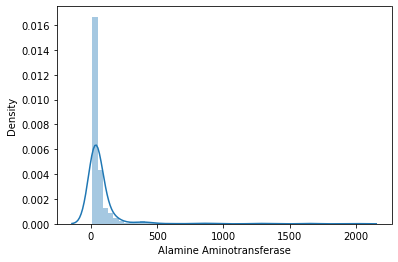

In [33]:
sns.distplot(data['Alamine Aminotransferase'])

<AxesSubplot:xlabel='Alamine Aminotransferase', ylabel='Density'>

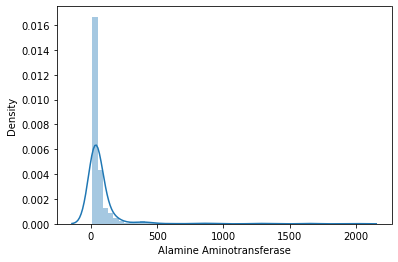

In [34]:
sns.distplot(data['Alamine Aminotransferase'])

In [35]:
df.head()

,age,gender,Total_Bilirubin,direct_bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Unhealty Liver
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Unhealty Liver
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Unhealty Liver
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Unhealty Liver
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Unhealty Liver


# Feature Engineering

In [36]:
df['Liver_disease']= df['Liver_disease'].replace(['Unhealty Liver','Healthy Liver'],[1,2])

In [37]:
# Changing the values in "Liver_Disease" column 
df['Liver_disease'] = df['Liver_disease'] - 1 
# Converting Gender column into categorical data 
LabelEncoder = LabelEncoder()
df['Is_male'] = LabelEncoder.fit_transform(df['gender'])
df = df.drop(columns='gender')

<AxesSubplot:title={'center':'Correlation with Liver Disease'}>

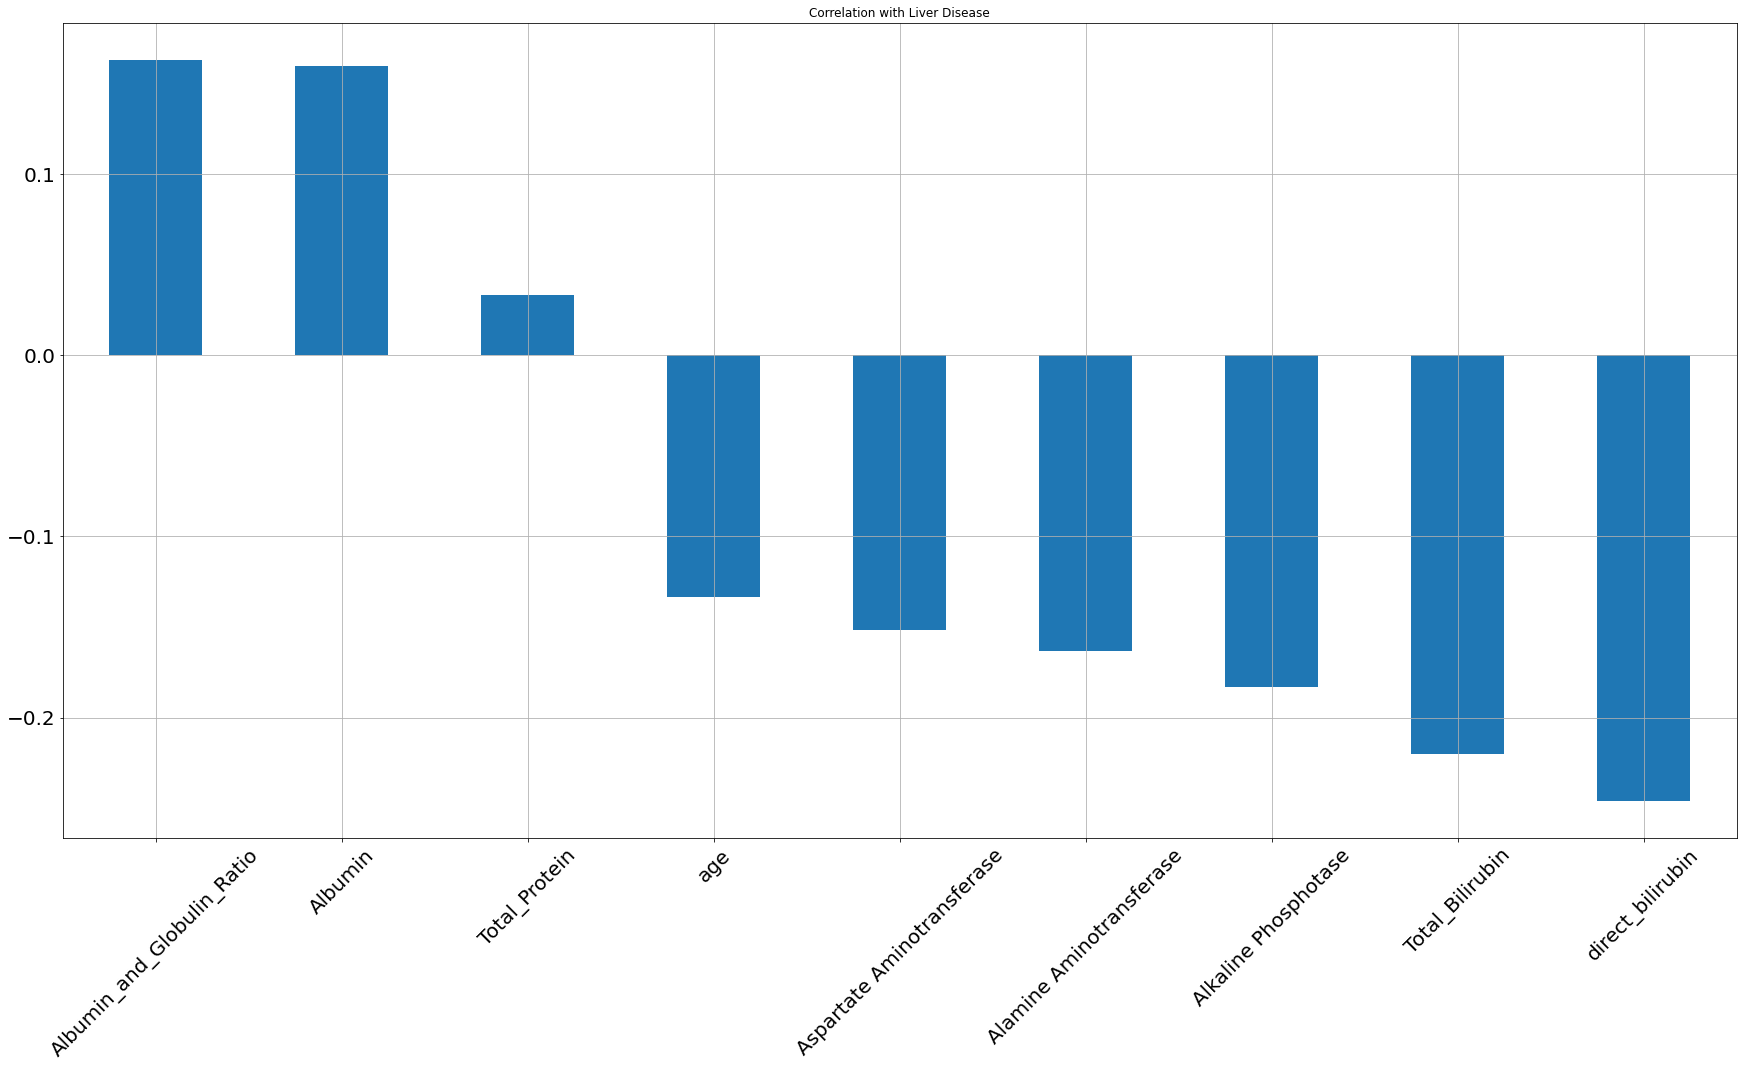

In [38]:
correlation = df.iloc[:,0:9]
correlation.corrwith(df['Liver_disease']).sort_values(ascending = False).plot.bar(
figsize = (30, 15), title = 'Correlation with Liver Disease', fontsize = 20, rot = 45, grid = True)

Text(0.5, 1.0, 'Correlation Chart')

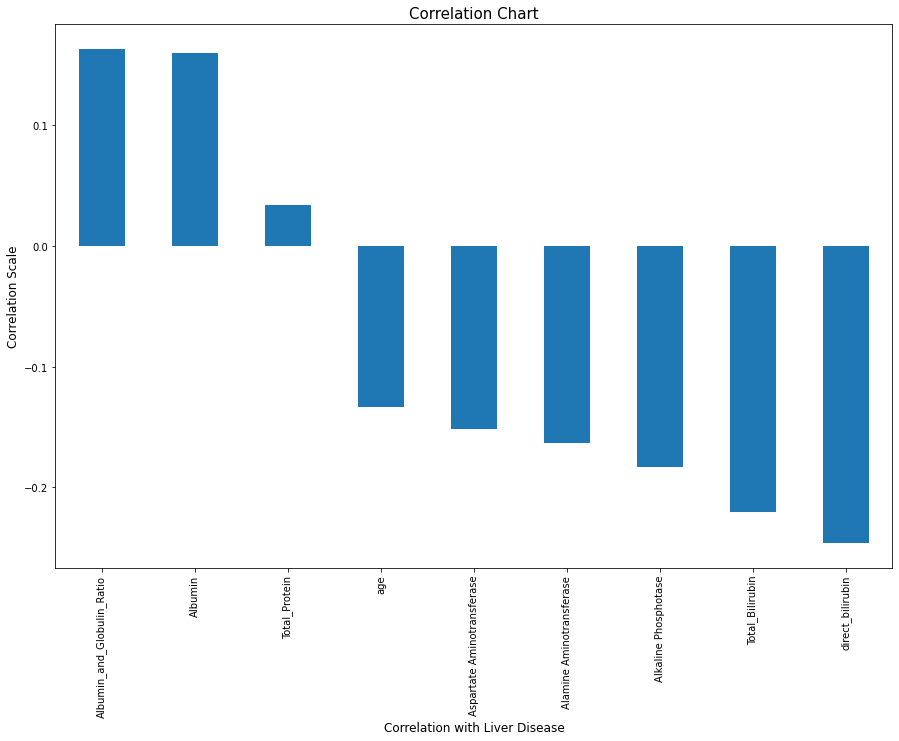

In [39]:
fig = plt.figure(figsize=(15, 10))
correlation = df.iloc[:,0:9]
corr = correlation.corrwith(df['Liver_disease']).sort_values(ascending = False)
corr.plot.bar()
plt.xlabel("Correlation with Liver Disease", fontsize= 12)
plt.ylabel("Correlation Scale", fontsize= 12)
plt.title("Correlation Chart", fontsize= 15)



<AxesSubplot:>

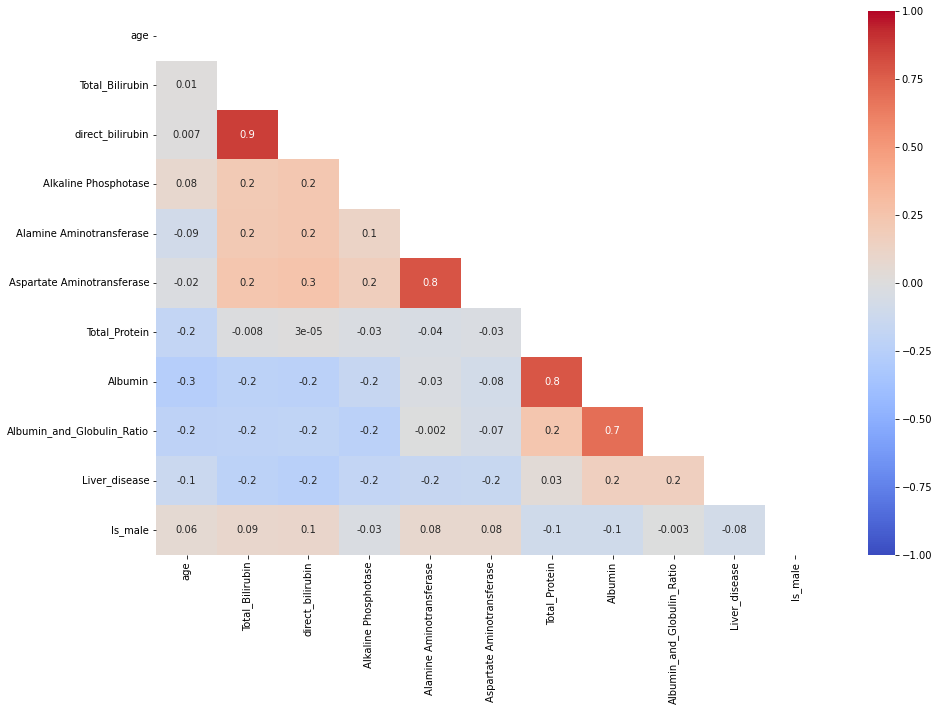

In [40]:
#correction matrix
plt.rcParams['figure.figsize']=(15.0,10.0)
matrix=np.triu(df.corr())
sns.heatmap(df.corr(),annot=True, fmt='.1g', vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=matrix)

**High Correlation**
1. direct bilurubin
2. Albumin
3. Alamine Aminotransferase
4. Aspartate Aminotransferase
5. Alkaline Phosphotase

Commonly used tests to check liver abnormalities are tests checking: https://www.healthline.com/health/liver-function-tests

* alanine transaminase (ALT)
* aspartate aminotransferase (AST)
* alkaline phosphatase (ALP)
* albumin
* bilirubin


In [41]:
y = df.Liver_disease
columns = ['age','Total_Protein','Is_male','Liver_disease']
x = df.drop(columns= columns, axis =1)

In [42]:
# Option 1 - normalize data
from sklearn import preprocessing
X_scaler = preprocessing.normalize(x)

<AxesSubplot:xlabel='Liver_disease', ylabel='count'>

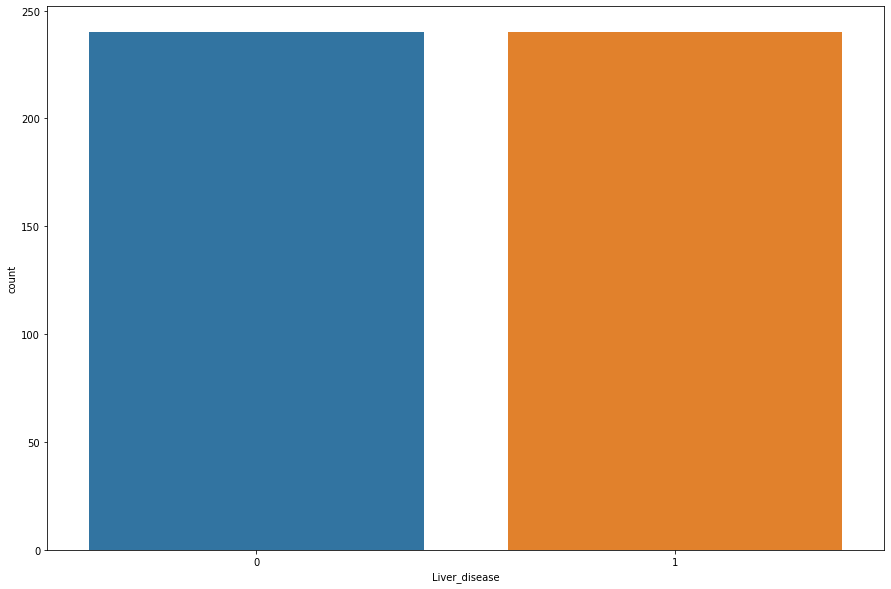

In [44]:
# Used standardized data
X_train, X_test, y_train, y_test = train_test_split(X_scaler,y,
                                                   test_size = 0.40,
                                                   random_state = 1)

# Imbalance data
from imblearn.over_sampling import SMOTE
# Intantiating Synthetic Minority Over Sampling Technique to balance target variable
sm = SMOTE(random_state=10)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
sns.countplot(y_smote)

# 1.0 Logistic Regression

In [45]:
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std

# Create the classifier: logreg
logreg = LogisticRegression(random_state=42)
logreg.fit(X_scaler, y)

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X_smote, y_smote, cv=5, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.64800347 0.52777778 0.68229167 0.55251736 0.57899306]


In [46]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)

grid_result = grid_search.fit(X_smote, y_smote)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.747627 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.747627 (0.065193) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.730961 (0.067283) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.730903 (0.067289) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.731076 (0.068313) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.744444 (0.068547) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.655382 (0.075695) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.655382 (0.075695) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.637326 (0.069299) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: 

              precision    recall  f1-score   support

           0       0.88      0.58      0.70       174
           1       0.38      0.76      0.50        58

    accuracy                           0.62       232
   macro avg       0.63      0.67      0.60       232
weighted avg       0.75      0.62      0.65       232



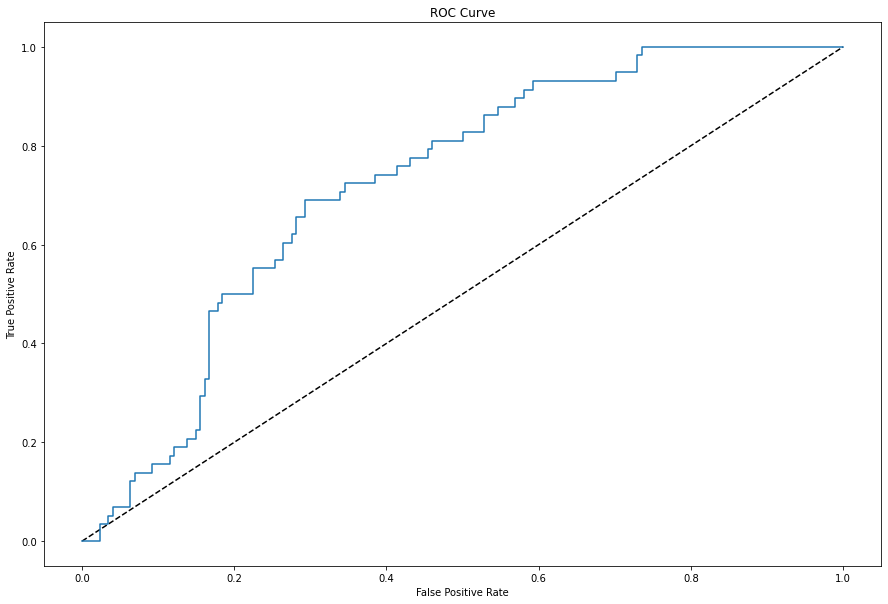

Text(240.00000000000017, 0.5, 'predicted class')

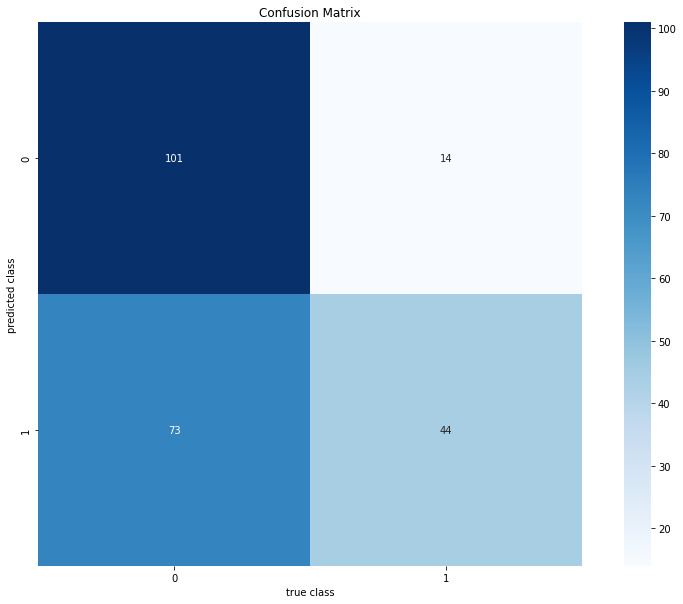

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

logreg = LogisticRegression(C=100, penalty= 'l1',solver= 'liblinear', random_state=0) 

logreg.fit(X_smote,y_smote)

#Predict the test set results
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(classification_report(y_test, y_pred))

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = True, cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')

# K-Nearest Neighbor

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Create the classifier: logreg
knn = KNeighborsClassifier() 
knn.fit(X_scaler, y)

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(knn, X_smote, y_smote, cv=5, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.57769097 0.63216146 0.77170139 0.66688368 0.74414062]


In [49]:
from sklearn.neighbors import KNeighborsClassifier

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(knn, hyperparameters, cv=cv)

#Fit the model
grid_result = clf.fit(X_smote,y_smote)

#Print The value of best Hyperparameters

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.696528 using {'leaf_size': 1, 'n_neighbors': 1, 'p': 1}
0.696528 (0.049208) with: {'leaf_size': 1, 'n_neighbors': 1, 'p': 1}
0.695833 (0.051763) with: {'leaf_size': 1, 'n_neighbors': 1, 'p': 2}
0.659028 (0.052837) with: {'leaf_size': 1, 'n_neighbors': 2, 'p': 1}
0.658333 (0.050633) with: {'leaf_size': 1, 'n_neighbors': 2, 'p': 2}
0.652083 (0.067002) with: {'leaf_size': 1, 'n_neighbors': 3, 'p': 1}
0.643056 (0.070697) with: {'leaf_size': 1, 'n_neighbors': 3, 'p': 2}
0.640972 (0.075439) with: {'leaf_size': 1, 'n_neighbors': 4, 'p': 1}
0.644444 (0.075679) with: {'leaf_size': 1, 'n_neighbors': 4, 'p': 2}
0.664583 (0.065296) with: {'leaf_size': 1, 'n_neighbors': 5, 'p': 1}
0.650694 (0.064926) with: {'leaf_size': 1, 'n_neighbors': 5, 'p': 2}
0.662500 (0.063053) with: {'leaf_size': 1, 'n_neighbors': 6, 'p': 1}
0.630556 (0.069291) with: {'leaf_size': 1, 'n_neighbors': 6, 'p': 2}
0.660417 (0.062070) with: {'leaf_size': 1, 'n_neighbors': 7, 'p': 1}
0.649306 (0.072185) with: {'leaf_size':

              precision    recall  f1-score   support

           0       0.80      0.68      0.73       174
           1       0.33      0.48      0.39        58

    accuracy                           0.63       232
   macro avg       0.57      0.58      0.56       232
weighted avg       0.68      0.63      0.65       232



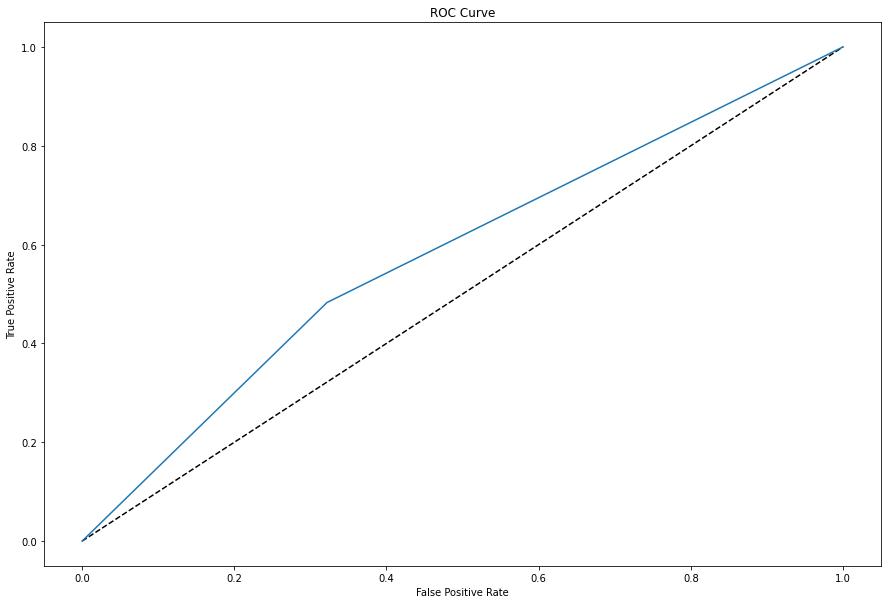

Text(240.00000000000017, 0.5, 'predicted class')

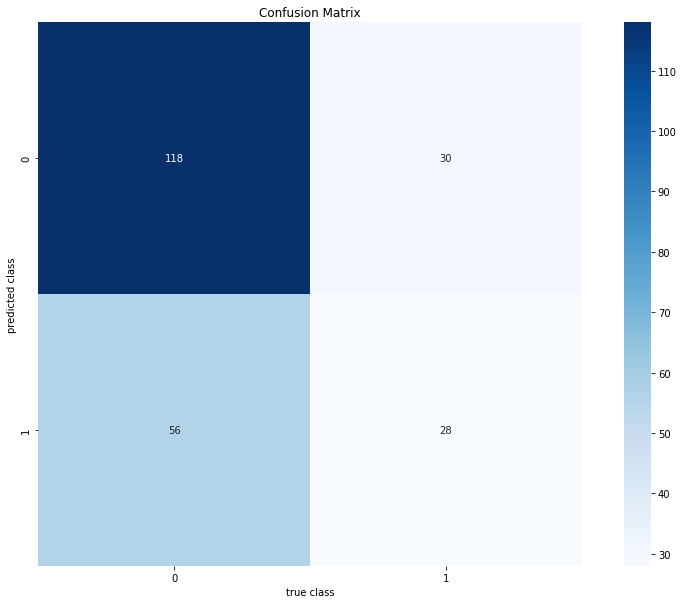

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

knn = KNeighborsClassifier(leaf_size=1, n_neighbors= 1, p= 1) 

knn.fit(X_smote,y_smote)

#Predict the test set results
y_pred = knn.predict(X_test)

# Compute and print the confusion matrix and classification report
print(classification_report(y_test, y_pred))

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = True, cmap ='Blues')

plt.title('Confusion Matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')

# 3.0 Decision Tree

In [51]:
# Create the classifier: 
dt = DecisionTreeClassifier()
dt.fit(X_scaler, y)

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(dt, X_smote, y_smote, cv=5, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.67708333 0.69791667 0.71875    0.61458333 0.73958333]


In [52]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


#List Hyperparameters that we want to tune.
param_dist = {"max_depth": [3, None],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf":[1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

dt = DecisionTreeClassifier()

#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
grid_search = GridSearchCV(dt,param_dist, cv=5)

#Fit the model
grid_result = grid_search.fit(X_smote,y_smote)

# Print the tuned parameters and score

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.725000 using {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 2}
0.668750 (0.054086) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1}
0.662500 (0.055356) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 2}
0.704167 (0.059875) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 3}
0.645833 (0.040074) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 4}
0.691667 (0.061308) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 5}
0.675000 (0.044390) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 6}
0.658333 (0.074068) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 7}
0.681250 (0.031319) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 8}
0.681250 (0.035232) with: {'criterion': 'gini', 

              precision    recall  f1-score   support

           0       0.87      0.54      0.67       174
           1       0.35      0.76      0.48        58

    accuracy                           0.59       232
   macro avg       0.61      0.65      0.58       232
weighted avg       0.74      0.59      0.62       232



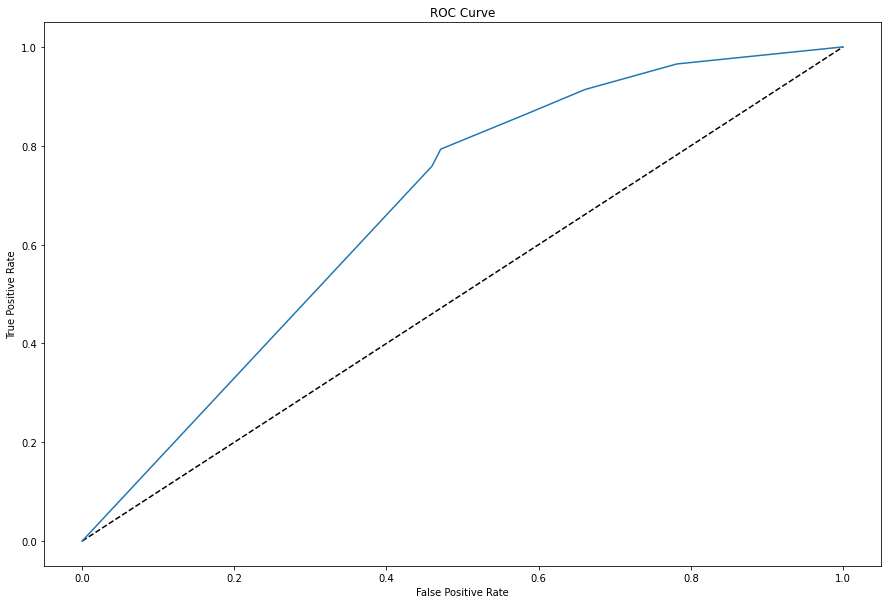

Text(240.00000000000017, 0.5, 'predicted class')

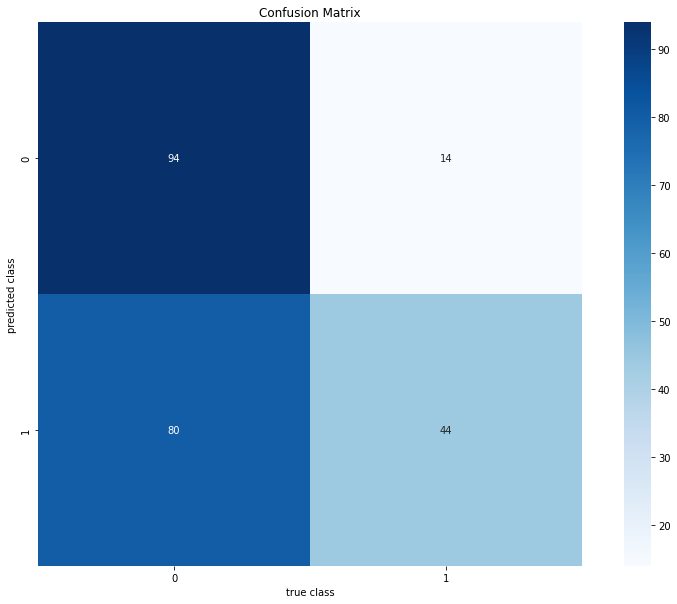

In [53]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth = 3 ,max_features=4 , min_samples_leaf =1)

dt.fit(X_smote,y_smote)

#Predict the test set results
y_pred = dt.predict(X_test)

# Compute and print the confusion matrix and classification report
print(classification_report(y_test, y_pred))

# Compute predicted probabilities: y_pred_prob
y_pred_prob = dt.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = True, cmap = 'Blues')

plt.title('Confusion Matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Create the classifier: logreg
rfc = RandomForestClassifier()
rfc.fit(X_scaler, y)

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(rfc, X_smote, y_smote, cv=5, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.77061632 0.74587674 0.8734809  0.79600694 0.89084201]


In [55]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

param = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid_search = GridSearchCV(rfc, param, cv = 5, verbose = 1, n_jobs = -1)
grid_result = grid_search.fit(X_smote, y_smote)

# Print the tuned parameters and score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best: 0.741667 using {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
0.739583 (0.053926) with: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.735417 (0.057660) with: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
0.737500 (0.057584) with: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.739583 (0.055512) with: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
0.741667 (0.054883) with: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1200}
0.729167 (0.059658) with: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.722917 (0.049564) with: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
0.737500 (0.059439) with: {'max_depth': 5, 'min_samp

              precision    recall  f1-score   support

           0       0.87      0.54      0.67       174
           1       0.35      0.76      0.48        58

    accuracy                           0.59       232
   macro avg       0.61      0.65      0.58       232
weighted avg       0.74      0.59      0.62       232



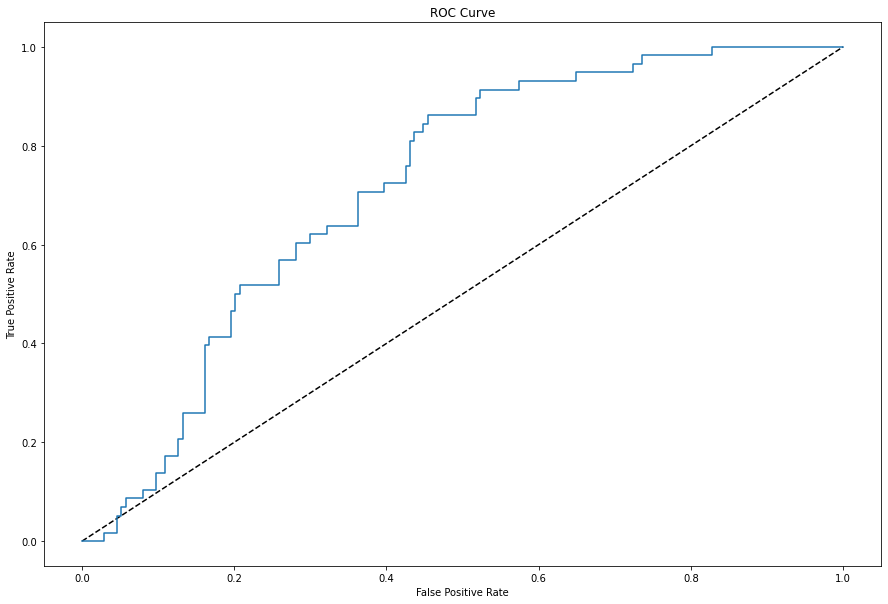

Text(240.00000000000017, 0.5, 'predicted class')

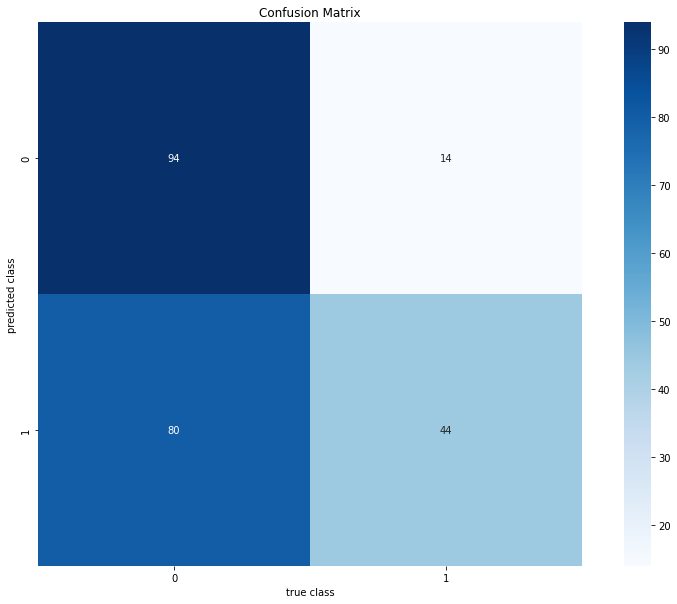

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators= 300, max_depth= 8, min_samples_leaf =2, min_samples_split =5)

# Fit rfc using X_train and y_train
rfc.fit(X_smote, y_smote)

# Create predictions on X_test
predictions = rfc.predict(X_test)

# Compute and print the confusion matrix and classification report
print(classification_report(y_test, y_pred))

# Compute predicted probabilities: y_pred_prob
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = True, cmap = 'Blues')

plt.title('Confusion Matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')

# XGBoost

In [58]:
import xgboost as xgb

# Create the DMatrix from X and y: churn_dmatrix
liver_dmatrix = xgb.DMatrix(data=x, label= y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain= liver_dmatrix, params= params,  
                  nfold=3, num_boost_round=5, 
                  metrics="error", as_pandas= True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.246114         0.011193         0.324698        0.013600
1          0.243523         0.005597         0.336788        0.021983
2          0.233161         0.002115         0.324698        0.010647
3          0.229706         0.006800         0.316062        0.019387
4          0.220207         0.008461         0.316062        0.019387
0.6839376666666666


In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier()

param_dist = {'n_estimators' :[50, 100, 200],'max_depth' : [5, 8, 15, 25, 30],
             'min_child_weight': [2, 5, 10], 'learning_rate' : [0.01,0.1]}

#Use GridSearch
cv = GridSearchCV(xg_cl,param_dist, cv=5)

#Fit the model
grid_result = cv.fit(X_smote,y_smote)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(n_estimators = 200,max_depth=15,min_child_weight= 2,
                          objective='binary:logistic', learning_rate=0.1 ,seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
y_pred = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

# Compute and print the confusion matrix and classification report
print(classification_report(y_test, y_pred))

# Compute predicted probabilities: y_pred_prob
y_pred_prob = xg_cl.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = True, cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')


In [ ]:
import matplotlib.pyplot as plt
# Create the DMatrix: housing_dmatrix
liver_dmatrix = xgb.DMatrix(data=x, label= y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=liver_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees = 0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees = 4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees = 9, rankdir='LR')
plt.show()

# Learning Rate

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt




In [ ]:
fig, axes = plt.subplots(3, figsize=(18, 20))

title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LogisticRegression() 
plot_learning_curve(estimator, title, X = X_smote, y = y_smote, axes=axes, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

In [ ]:
fig, axes = plt.subplots(3, figsize=(18, 20))

title = "Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(criterion='entropy', max_depth = 3 ,max_features=3 , min_samples_leaf =3) 
plot_learning_curve(estimator, title, X = X_smote, y = y_smote, axes=axes, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

In [ ]:
fig, axes = plt.subplots(3, figsize=(18, 20))

title = "Learning Curves (K Nearest Neighbor)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier() 
plot_learning_curve(estimator, title, X = X_smote, y = y_smote, axes=axes, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

In [ ]:
fig, axes = plt.subplots(3, figsize=(18, 20))

title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RandomForestClassifier(n_estimators= 500, max_depth= 8, min_samples_leaf =1, min_samples_split =2) 
plot_learning_curve(estimator, title, X = X_smote, y = y_smote, axes=axes, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

In [ ]:
fig, axes = plt.subplots(3, figsize=(18, 20))


title = "Learning Curves (XGBoost)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = xgb.XGBClassifier(n_estimators = 200,max_depth=15,min_child_weight= 2,
                          objective='binary:logistic', learning_rate=0.15 ,seed=123)
plot_learning_curve(estimator, title, X = X_smote, y = y_smote, axes=axes, ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)

In [ ]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(df.Liver_disease)



y = df.Liver_disease
columns = ['age','Total_Protein','Is_male','Liver_disease']
x = df.drop(columns= columns, axis =1)